## Matrix multiplication from the foundations
- python
- matplotlib
- python standard library


> Fill in a module description here

In [1]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

In [3]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [4]:
!ls -a data

.            ..           mnist.pkl.gz


In [5]:
with gzip.open(path_gz, 'rb') as f:
    ((x_train, y_train),(x_valid, y_valid),_) = pickle.load(f, encoding='latin1')

In [6]:
lst = list(x_train[0])
vals = lst[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [7]:
def chunks(x, sz):
    for i in range(0,len(x),sz):
        yield x[i:i+sz]

In [8]:
list(chunks(vals,5))

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

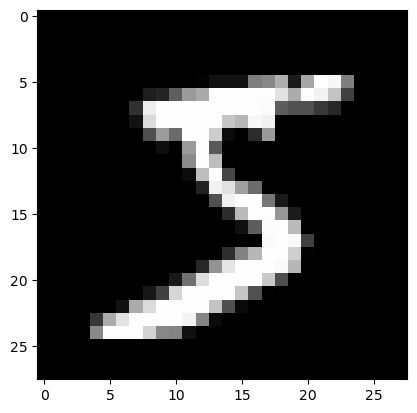

In [9]:
mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst,28)))

In [10]:
from itertools import islice

In [11]:
it = iter(vals)
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [12]:
list(islice(it,5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [13]:
list(islice(it,5))

[]

In [14]:
it = iter(lst)
img = list(iter(lambda: list(islice(it,28)), []))

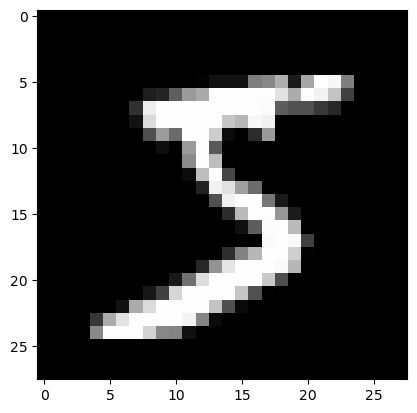

In [15]:
plt.imshow(img)

In [16]:
import torch
from torch import tensor

In [17]:
x_train,y_train, x_valid, y_valid = map(tensor, [x_train,y_train,x_valid,y_valid])

In [18]:
type(x_train)

torch.Tensor

In [19]:
x_train.shape

torch.Size([50000, 784])

In [20]:
x_train.type()

'torch.FloatTensor'

In [21]:
imgs = x_train.reshape((-1,28,28))
imgs.shape

torch.Size([50000, 28, 28])

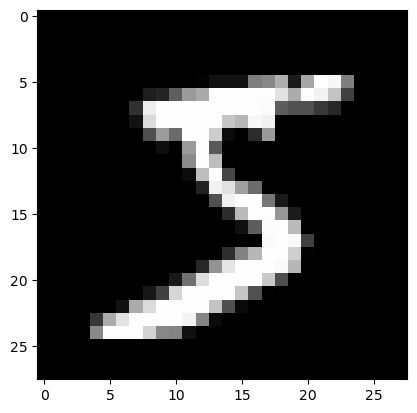

In [22]:
plt.imshow(imgs[0])

In [23]:
min(y_train),max(y_train)

(tensor(0), tensor(9))

### Matrix Multiplications


In [24]:
torch.manual_seed(1)
weights = torch.randn(784,10)
bias = torch.zeros(10)

In [25]:
m1 = x_valid[:5]
m2 = weights

In [26]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))